In [3]:
 import torch
 import torch.nn as nn 
 import torchvision
 import torchvision.transforms as transforms
 import matplotlib.pyplot as plt 

In [4]:
 input_size = 784 # 28x28
 hidden_size = 500 
 num_classes = 10
 num_epochs = 2
 batch_size = 100
 learning_rate = 0.001

In [5]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                            train=True, 
                                       transform=transforms.ToTensor(),  
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=False, 
                                           transform=transforms.ToTensor()) 


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)
 

In [7]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


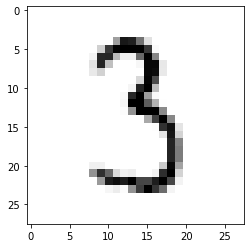

In [10]:
plt.imshow(images[6].numpy().squeeze(), cmap='gray_r');

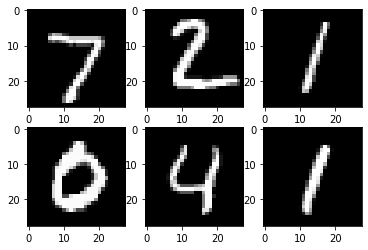

In [12]:
 examples = iter(test_loader)
 example_data, example_targets = examples.next()
 for i in range(6):
     plt.subplot(2,3,i+1)
     plt.imshow(example_data[i][0], cmap='gray')
 plt.show()

In [13]:
 class NeuralNet(nn.Module):
     def __init__(self, input_size, hidden_size, num_classes):
         super(NeuralNet, self).__init__()
         self.input_size = input_size
         self.l1 = nn.Linear(input_size, hidden_size) 
         self.relu = nn.ReLU()
         self.l2 = nn.Linear(hidden_size, num_classes)
     def forward(self, x):
         out = self.l1(x)
         out = self.relu(out)
         out = self.l2(out)
         return out

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [15]:
 # Loss and optimizer
 criterion = nn.CrossEntropyLoss()
 optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
 n_total_steps = len(train_loader)
 for epoch in range(num_epochs):
     for i, (images, labels) in enumerate(train_loader):  
         # origin shape: [100, 1, 28, 28]
         # resized: [100, 784]
         images = images.reshape(-1, 28*28).to(device)
         labels = labels.to(device)
         # Forward pass
         outputs = model(images)
         loss = criterion(outputs, labels)
         # Backward and optimize
         optimizer.zero_grad()
         loss.backward()
         optimizer.step() 
         if (i+1) % 100 == 0:
             print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}') 

Epoch [1/2], Step[100/600], Loss: 0.3680
Epoch [1/2], Step[200/600], Loss: 0.2479
Epoch [1/2], Step[300/600], Loss: 0.2225
Epoch [1/2], Step[400/600], Loss: 0.2199
Epoch [1/2], Step[500/600], Loss: 0.1783
Epoch [1/2], Step[600/600], Loss: 0.1333
Epoch [2/2], Step[100/600], Loss: 0.0996
Epoch [2/2], Step[200/600], Loss: 0.1010
Epoch [2/2], Step[300/600], Loss: 0.0775
Epoch [2/2], Step[400/600], Loss: 0.0818
Epoch [2/2], Step[500/600], Loss: 0.1945
Epoch [2/2], Step[600/600], Loss: 0.1269


In [17]:
with torch.no_grad():
     n_correct = 0
     n_samples = 0
     for images, labels in test_loader:
         images = images.reshape(-1, 28*28).to(device)
         labels = labels.to(device)
         outputs = model(images)
         # max returns (value ,index)
         _, predicted = torch.max(outputs.data, 1)
         n_samples += labels.size(0)
         n_correct += (predicted == labels).sum().item()
         

In [18]:
acc = 100.0 * n_correct / n_samples
print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.13 %


Predicted Digit = 9


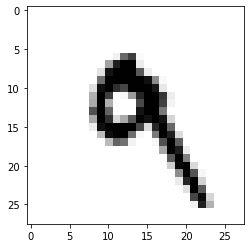

In [26]:
images, labels = next(iter(test_loader))
plt.imshow(images[7].numpy().squeeze(), cmap='gray_r');
img = images[7].view(1, 784)
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))